In [801]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None


# Read and understand the data

In [802]:
xleads = pd.read_csv('Leads.csv')

# looking at the entries
xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [803]:
# Inspect the shape of the dataset
xleads.shape

(9240, 37)

In [804]:
# Check the summary of the dataset
xleads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [805]:
# Check the info to see the null values present and the feature variables

xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning and Preparation

In [806]:
# Checking the number of missing values in each column
xleads.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

As you can see there are a lot of column which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [807]:
# Drop all the columns in which greater than 3000 missing values are present
for col in xleads.columns:
    if xleads[col].isnull().sum() > 3000:
        xleads.drop(col, 1, inplace=True)

In [808]:
# Check the number of null values again

xleads.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Do Not Call                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Email                                        0
Lead Origin                 

the variable City and country aren't really of  much use in our analysis. So we can drop it.

In [809]:
xleads.drop(['City','Country'], axis = 1, inplace = True)

lets now checkon what kind of values do we have in our columns

In [810]:
# Get the value counts of all the columns

for column in xleads:
    print(xleads[column].value_counts())
    print('##############################################')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
##############################################
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
##############################################
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
############################

here we can see three columns have select out of them Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so we drop them.

In [811]:
xleads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article etc. Since most of the values are No,we drop these columns

In [812]:
xleads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

the column What matters most to you in choosing a course has the value Better Career Prospects 6528 times. So we drop this column.

In [813]:
xleads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [814]:
# Check the number of null values again
xleads.isnull().sum().sort_values()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
Lead Source                                 36
Last Activity                              103
TotalVisits                                137
Page Views Per Visit                       137
Specialization                            1438
What is your current occupation           2690
dtype: int64

the column What is your current occupation has a lot of null values but since we have already lost so many feature variables, So let's just drop the null rows for the column `What is you current occupation`.

In [815]:
xleads = xleads[~pd.isnull(xleads['What is your current occupation'])]

In [816]:
# Check the number of null values again
xleads.isnull().sum().sort_values()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
Specialization                             18
Lead Source                                36
Last Activity                             103
TotalVisits                               130
Page Views Per Visit                      130
dtype: int64

now the number of null values present in the columns are very small we can simply drop just these null values 

In [817]:
# Drop the null value rows in the column 'TotalVisits'
xleads = xleads[~pd.isnull(xleads['TotalVisits'])]

In [818]:
# Check the null values again
xleads.isnull().sum().sort_values()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
Specialization                            18
Lead Source                               29
dtype: int64

In [819]:
# Drop the null values rows in the column 'Lead Source'
xleads = xleads[~pd.isnull(xleads['Lead Source'])]

In [820]:
# Check the number of null values again
xleads.isnull().sum().sort_values()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
Specialization                            18
dtype: int64

In [821]:
# Drop the null values rows in the column 'Specialization'
xleads = xleads[~pd.isnull(xleads['Specialization'])]

In [822]:
# Check the number of null values again
xleads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the number of rows that we have retained.

In [823]:
xleads.shape

(6373, 14)

also the columns Prospect ID and Lead Number are of no use in the analysis, so we drop them.

In [824]:
xleads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [825]:
#checking the final data set 
xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# dummy variable preparation 

In [826]:
# Creating dummy variables 
dummy = pd.get_dummies(xleads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
xleads = pd.concat([xleads, dummy], axis=1)

### Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we can drop that level by specifying it explicitly

In [827]:
dummy_spl = pd.get_dummies(xleads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
xleads = pd.concat([xleads, dummy_spl], axis = 1)

### Dropping the variables for which the dummy variables have been created

In [828]:
xleads = xleads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [829]:
xleads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train-Test Split & Logistic Regression Model Building:

In [830]:
# Putting response variable to y
y = xleads['Converted']
y.head()
# Putting rest variable to X
X= xleads.drop('Converted', axis=1)

In [831]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [832]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4461 entries, 8003 to 8217
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4461 non-null   float64
 1   Total Time Spent on Website                           4461 non-null   int64  
 2   Page Views Per Visit                                  4461 non-null   float64
 3   Lead Origin_Landing Page Submission                   4461 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4461 non-null   uint8  
 5   Lead Origin_Lead Import                               4461 non-null   uint8  
 6   Lead Source_Direct Traffic                            4461 non-null   uint8  
 7   Lead Source_Facebook                                  4461 non-null   uint8  
 8   Lead Source_Google                                    4

### Scaling of Data:

In [833]:
#scaling numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.064874,-0.824395,-0.223652,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.064874,-0.611929,0.753710,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.431907,-0.804919,1.731071,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Model Building using Stats Model & RFE:

In [834]:
logreg = LogisticRegression()

In [835]:
rfe = RFE(logreg, step = 15)        
rfe = rfe.fit(X_train, y_train)

In [836]:
rfe.support_

array([False,  True, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True])

In [837]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 3),
 ('Lead Source_testone', False, 3),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4)

In [838]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Speciali

In [839]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Other',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Marked Spam',
       'Last 

### now that we have our rfe selected variables lets use stats model to get the p values and VIF's in order as well 

In [840]:
#### lets first build a model from our current set and checck the p-values and VIF's on our data set 

In [841]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1990.8
Date:                Sat, 04 Mar 2023   Deviance:                       3981.5
Time:                        10:26:41   Pearson chi2:                 4.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3889
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2495      0.612      2.040      0.041       0.049       2.450
Total Time Spent on Website                              1.0799      0.047     23.072      0.000       0.988       1.172
Lead Origin_Landing Page Submission                     -0.7825      0.138     -5.684      0.000      -1.052      -0.513
Lead Origin_Lead Add Form                                2.1159      1.161      1.823      0.068      -0.159       4.391
Lead Source_Direct Traffic                              -0.4332      0.100     -4.341      0.000      -0.629      -0.238
Lead Source_Olark Chat                                   1.1592      0.140      8.261      0.000       0.884       1.434
Lead Source_Reference                                    1.4397      1.184      1.216      0.224      -0.881       3.761
Lead Source_Welingak Website                             4.0146      1.536      2.613      0.009       1.003       7.026
Do Not Email_Yes                                        -1.4824      0.226     -6.563      0.000      -1.925      -1.040
Last Activity_Converted to Lead                         -0.7054      0.230     -3.062      0.002      -1.157      -0.254
Last Activity_Email Bounced                             -1.4069      0.675     -2.086      0.037      -2.729      -0.085
Last Activity_Had a Phone Conversation                   1.2449      0.996      1.250      0.211      -0.708       3.197
Last Activity_Olark Chat Conversation                   -1.1606      0.199     -5.840      0.000      -1.550      -0.771
What is your current occupation_Housewife               22.5656   2.41e+04      0.001      0.999   -4.72e+04    4.72e+04
What is your current occupation_Student                 -0.9639      0.643     -1.499      0.134      -2.224       0.296
What is your current occupation_Unemployed              -1.1147      0.602     -1.851      0.064      -2.295       0.065
What is your current occupation_Working Professional     1.4095      0.632      2.231      0.026       0.171       2.648
Last Notable Activity_Email Bounced                      1.1336      0.812      1.396      0.163      -0.458       2.725
Last Notable Activity_Email Link Clicked                -1.3981      0.287     -4.873      0.000      -1.960      -0.836
Last Notable Activity_Email Opened                      -0.9018      0.096     -9.403      0.000      -1.090      -0.714
Last Notable Activity_Had a Phone Conversation          21.6397   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
Last Notable Activity_Modified                          -1.2777      0.111    -11.512      0.000      -1.495      -1.060
Last Notable Activity_Unreachable                        1

In [842]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.56
5,Lead Source_Reference,65.36
6,Lead Source_Welingak Website,20.07
14,What is your current occupation_Unemployed,7.22
1,Lead Origin_Landing Page Submission,6.69
19,Last Notable Activity_Had a Phone Conversation,2.46
10,Last Activity_Had a Phone Conversation,2.46
20,Last Notable Activity_Modified,2.44
18,Last Notable Activity_Email Opened,2.04
9,Last Activity_Email Bounced,2.03


### from this we can observe that. there are two values with extremely high p values and 3 variables with very high vif so lets drop them

In [843]:
#dropping variable with high VIF

col = col.drop('Lead Origin_Lead Add Form',1)

In [844]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1992.8
Date:                Sat, 04 Mar 2023   Deviance:                       3985.6
Time:                        10:26:41   Pearson chi2:                 4.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2622      0.612      2.062      0.039       0.062       2.462
Total Time Spent on Website                              1.0758      0.047     23.047      0.000       0.984       1.167
Lead Origin_Landing Page Submission                     -0.8006      0.137     -5.825      0.000      -1.070      -0.531
Lead Source_Direct Traffic                              -0.4340      0.100     -4.352      0.000      -0.629      -0.239
Lead Source_Olark Chat                                   1.1420      0.140      8.167      0.000       0.868       1.416
Lead Source_Reference                                    3.5352      0.277     12.779      0.000       2.993       4.077
Lead Source_Welingak Website                             6.1126      1.016      6.017      0.000       4.122       8.104
Do Not Email_Yes                                        -1.4856      0.226     -6.581      0.000      -1.928      -1.043
Last Activity_Converted to Lead                         -0.7116      0.230     -3.092      0.002      -1.163      -0.261
Last Activity_Email Bounced                             -1.4050      0.674     -2.084      0.037      -2.726      -0.084
Last Activity_Had a Phone Conversation                   1.2347      0.995      1.241      0.215      -0.716       3.185
Last Activity_Olark Chat Conversation                   -1.1665      0.199     -5.874      0.000      -1.556      -0.777
What is your current occupation_Housewife               22.5648   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
What is your current occupation_Student                 -0.9627      0.643     -1.498      0.134      -2.222       0.297
What is your current occupation_Unemployed              -1.1118      0.602     -1.847      0.065      -2.291       0.068
What is your current occupation_Working Professional     1.4089      0.632      2.230      0.026       0.171       2.647
Last Notable Activity_Email Bounced                      1.1309      0.812      1.393      0.164      -0.460       2.722
Last Notable Activity_Email Link Clicked                -1.4017      0.287     -4.887      0.000      -1.964      -0.840
Last Notable Activity_Email Opened                      -0.9048      0.096     -9.440      0.000      -1.093      -0.717
Last Notable Activity_Had a Phone Conversation          21.6432   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
Last Notable Activity_Modified                          -1.2781      0.111    -11.525      0.000      -1.495      -1.061
Last Notable Activity_Unreachable                        1.4639      0.817      1.792      0.073      -0.137       3.065
Specialization_Banking, Investment And Insurance         1

In [845]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,7.20
1,Lead Origin_Landing Page Submission,6.67
18,Last Notable Activity_Had a Phone Conversation,2.46
9,Last Activity_Had a Phone Conversation,2.46
19,Last Notable Activity_Modified,2.44
17,Last Notable Activity_Email Opened,2.04
8,Last Activity_Email Bounced,2.03
2,Lead Source_Direct Traffic,1.94
3,Lead Source_Olark Chat,1.94
25,Specialization_Finance Management,1.94


In [846]:
#dropping variable with high VIF
col = col.drop('What is your current occupation_Unemployed',1)

In [847]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1994.6
Date:                Sat, 04 Mar 2023   Deviance:                       3989.2
Time:                        10:26:42   Pearson chi2:                 4.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1494      0.110      1.360      0.174      -0.066       0.365
Total Time Spent on Website                              1.0763      0.047     23.067      0.000       0.985       1.168
Lead Origin_Landing Page Submission                     -0.8090      0.137     -5.892      0.000      -1.078      -0.540
Lead Source_Direct Traffic                              -0.4292      0.100     -4.310      0.000      -0.624      -0.234
Lead Source_Olark Chat                                   1.1393      0.140      8.152      0.000       0.865       1.413
Lead Source_Reference                                    3.5300      0.277     12.766      0.000       2.988       4.072
Lead Source_Welingak Website                             6.1069      1.016      6.012      0.000       4.116       8.098
Do Not Email_Yes                                        -1.4754      0.225     -6.545      0.000      -1.917      -1.034
Last Activity_Converted to Lead                         -0.7203      0.230     -3.130      0.002      -1.171      -0.269
Last Activity_Email Bounced                             -1.4222      0.674     -2.109      0.035      -2.744      -0.100
Last Activity_Had a Phone Conversation                   1.2288      0.995      1.235      0.217      -0.721       3.179
Last Activity_Olark Chat Conversation                   -1.1706      0.199     -5.894      0.000      -1.560      -0.781
What is your current occupation_Housewife               23.6639   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
What is your current occupation_Student                  0.1437      0.232      0.619      0.536      -0.311       0.599
What is your current occupation_Working Professional     2.5136      0.203     12.386      0.000       2.116       2.911
Last Notable Activity_Email Bounced                      1.1400      0.812      1.404      0.160      -0.451       2.731
Last Notable Activity_Email Link Clicked                -1.4024      0.287     -4.890      0.000      -1.964      -0.840
Last Notable Activity_Email Opened                      -0.8966      0.096     -9.370      0.000      -1.084      -0.709
Last Notable Activity_Had a Phone Conversation          21.6451   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
Last Notable Activity_Modified                          -1.2710      0.111    -11.472      0.000      -1.488      -1.054
Last Notable Activity_Unreachable                        1.4750      0.815      1.811      0.070      -0.122       3.072
Specialization_Banking, Investment And Insurance         1.3996      0.230      6.081      0.000       0.948       1.851
Specialization_Business Administration                   0

In [848]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,5.92
17,Last Notable Activity_Had a Phone Conversation,2.46
9,Last Activity_Had a Phone Conversation,2.46
18,Last Notable Activity_Modified,2.08
8,Last Activity_Email Bounced,2.02
2,Lead Source_Direct Traffic,1.93
24,Specialization_Finance Management,1.86
26,Specialization_Human Resource Management,1.73
6,Do Not Email_Yes,1.69
29,Specialization_Marketing Management,1.66


### now that all our vif's are in an acceptable range let us work on dropping the high p values 

### dropping column with high p-value

In [849]:
#dropping column with high p-value

col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [850]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1995.8
Date:                Sat, 04 Mar 2023   Deviance:                       3991.5
Time:                        10:26:42   Pearson chi2:                 4.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1499      0.110      1.363      0.173      -0.066       0.365
Total Time Spent on Website                              1.0756      0.047     23.051      0.000       0.984       1.167
Lead Origin_Landing Page Submission                     -0.8070      0.137     -5.882      0.000      -1.076      -0.538
Lead Source_Direct Traffic                              -0.4323      0.100     -4.344      0.000      -0.627      -0.237
Lead Source_Olark Chat                                   1.1408      0.140      8.160      0.000       0.867       1.415
Lead Source_Reference                                    3.5324      0.277     12.771      0.000       2.990       4.074
Lead Source_Welingak Website                             6.1103      1.016      6.015      0.000       4.119       8.101
Do Not Email_Yes                                        -1.4776      0.225     -6.554      0.000      -1.919      -1.036
Last Activity_Converted to Lead                         -0.7136      0.230     -3.102      0.002      -1.164      -0.263
Last Activity_Email Bounced                             -1.4152      0.675     -2.098      0.036      -2.738      -0.093
Last Activity_Had a Phone Conversation                   2.0642      0.822      2.512      0.012       0.453       3.675
Last Activity_Olark Chat Conversation                   -1.1661      0.199     -5.870      0.000      -1.556      -0.777
What is your current occupation_Housewife               22.6639   1.46e+04      0.002      0.999   -2.86e+04    2.87e+04
What is your current occupation_Student                  0.1435      0.232      0.618      0.537      -0.312       0.599
What is your current occupation_Working Professional     2.5119      0.203     12.373      0.000       2.114       2.910
Last Notable Activity_Email Bounced                      1.1336      0.812      1.396      0.163      -0.458       2.725
Last Notable Activity_Email Link Clicked                -1.4056      0.287     -4.900      0.000      -1.968      -0.843
Last Notable Activity_Email Opened                      -0.9001      0.096     -9.408      0.000      -1.088      -0.713
Last Notable Activity_Modified                          -1.2806      0.111    -11.578      0.000      -1.497      -1.064
Last Notable Activity_Unreachable                        1.4719      0.815      1.807      0.071      -0.125       3.068
Specialization_Banking, Investment And Insurance         1.4114      0.229      6.151      0.000       0.962       1.861
Specialization_Business Administration                   0.8391      0.206      4.074      0.000       0.435       1.243
Specialization_E-Business                                0

In [851]:
col = col.drop('What is your current occupation_Housewife',1)

In [852]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4427
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.4
Date:                Sat, 04 Mar 2023   Deviance:                       4002.7
Time:                        10:26:42   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1454      0.110      1.324      0.186      -0.070       0.361
Total Time Spent on Website                              1.0747      0.047     23.061      0.000       0.983       1.166
Lead Origin_Landing Page Submission                     -0.8013      0.137     -5.851      0.000      -1.070      -0.533
Lead Source_Direct Traffic                              -0.4382      0.099     -4.411      0.000      -0.633      -0.244
Lead Source_Olark Chat                                   1.1382      0.140      8.146      0.000       0.864       1.412
Lead Source_Reference                                    3.5383      0.276     12.801      0.000       2.997       4.080
Lead Source_Welingak Website                             6.1080      1.016      6.013      0.000       4.117       8.099
Do Not Email_Yes                                        -1.4823      0.225     -6.575      0.000      -1.924      -1.040
Last Activity_Converted to Lead                         -0.7225      0.230     -3.143      0.002      -1.173      -0.272
Last Activity_Email Bounced                             -1.4202      0.675     -2.105      0.035      -2.742      -0.098
Last Activity_Had a Phone Conversation                   2.0549      0.822      2.501      0.012       0.445       3.665
Last Activity_Olark Chat Conversation                   -1.1688      0.199     -5.885      0.000      -1.558      -0.779
What is your current occupation_Student                  0.1377      0.232      0.593      0.553      -0.317       0.593
What is your current occupation_Working Professional     2.5031      0.203     12.337      0.000       2.105       2.901
Last Notable Activity_Email Bounced                      1.1477      0.812      1.414      0.157      -0.444       2.739
Last Notable Activity_Email Link Clicked                -1.3965      0.286     -4.887      0.000      -1.957      -0.836
Last Notable Activity_Email Opened                      -0.8920      0.096     -9.335      0.000      -1.079      -0.705
Last Notable Activity_Modified                          -1.2700      0.110    -11.507      0.000      -1.486      -1.054
Last Notable Activity_Unreachable                        1.4751      0.815      1.811      0.070      -0.122       3.072
Specialization_Banking, Investment And Insurance         1.4089      0.229      6.144      0.000       0.960       1.858
Specialization_Business Administration                   0.8560      0.205      4.167      0.000       0.453       1.259
Specialization_E-Business                                0.9786      0.473      2.068      0.039       0.051       1.906
Specialization_E-COMMERCE                                1

In [853]:
#dropping variable with high p value
col = col.drop('What is your current occupation_Student',1)

In [854]:
#BUILDING MODEL #6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4428
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.5
Date:                Sat, 04 Mar 2023   Deviance:                       4003.1
Time:                        10:26:42   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3859
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1471      0.110      1.339      0.180      -0.068       0.362
Total Time Spent on Website                              1.0750      0.047     23.068      0.000       0.984       1.166
Lead Origin_Landing Page Submission                     -0.8014      0.137     -5.853      0.000      -1.070      -0.533
Lead Source_Direct Traffic                              -0.4360      0.099     -4.392      0.000      -0.630      -0.241
Lead Source_Olark Chat                                   1.1417      0.140      8.177      0.000       0.868       1.415
Lead Source_Reference                                    3.5400      0.276     12.809      0.000       2.998       4.082
Lead Source_Welingak Website                             6.1071      1.016      6.012      0.000       4.116       8.098
Do Not Email_Yes                                        -1.4850      0.225     -6.587      0.000      -1.927      -1.043
Last Activity_Converted to Lead                         -0.7217      0.230     -3.139      0.002      -1.172      -0.271
Last Activity_Email Bounced                             -1.4187      0.674     -2.104      0.035      -2.741      -0.097
Last Activity_Had a Phone Conversation                   2.0524      0.822      2.498      0.012       0.442       3.663
Last Activity_Olark Chat Conversation                   -1.1614      0.198     -5.859      0.000      -1.550      -0.773
What is your current occupation_Working Professional     2.4994      0.203     12.324      0.000       2.102       2.897
Last Notable Activity_Email Bounced                      1.1480      0.812      1.414      0.157      -0.443       2.739
Last Notable Activity_Email Link Clicked                -1.3955      0.286     -4.884      0.000      -1.955      -0.835
Last Notable Activity_Email Opened                      -0.8895      0.095     -9.320      0.000      -1.077      -0.702
Last Notable Activity_Modified                          -1.2706      0.110    -11.512      0.000      -1.487      -1.054
Last Notable Activity_Unreachable                        1.4726      0.815      1.808      0.071      -0.124       3.069
Specialization_Banking, Investment And Insurance         1.4119      0.229      6.163      0.000       0.963       1.861
Specialization_Business Administration                   0.8570      0.205      4.170      0.000       0.454       1.260
Specialization_E-Business                                0.9823      0.473      2.076      0.038       0.055       1.910
Specialization_E-COMMERCE                                1.2380      0.351      3.531      0.000       0.551       1.925
Specialization_Finance Management                        0

In [855]:
#dropping variable with high p value
col = col.drop('Last Notable Activity_Email Bounced',1)

In [856]:
#BUILDING MODEL #7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4429
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2002.6
Date:                Sat, 04 Mar 2023   Deviance:                       4005.2
Time:                        10:26:42   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3856
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1576      0.110      1.438      0.150      -0.057       0.372
Total Time Spent on Website                              1.0753      0.047     23.078      0.000       0.984       1.167
Lead Origin_Landing Page Submission                     -0.8033      0.137     -5.864      0.000      -1.072      -0.535
Lead Source_Direct Traffic                              -0.4334      0.099     -4.368      0.000      -0.628      -0.239
Lead Source_Olark Chat                                   1.1386      0.140      8.156      0.000       0.865       1.412
Lead Source_Reference                                    3.5409      0.276     12.812      0.000       2.999       4.083
Lead Source_Welingak Website                             6.1032      1.016      6.009      0.000       4.112       8.094
Do Not Email_Yes                                        -1.4679      0.223     -6.568      0.000      -1.906      -1.030
Last Activity_Converted to Lead                         -0.7069      0.230     -3.078      0.002      -1.157      -0.257
Last Activity_Email Bounced                             -0.7773      0.422     -1.842      0.065      -1.604       0.050
Last Activity_Had a Phone Conversation                   2.0576      0.822      2.503      0.012       0.446       3.669
Last Activity_Olark Chat Conversation                   -1.1529      0.198     -5.816      0.000      -1.541      -0.764
What is your current occupation_Working Professional     2.4954      0.202     12.330      0.000       2.099       2.892
Last Notable Activity_Email Link Clicked                -1.4018      0.286     -4.908      0.000      -1.962      -0.842
Last Notable Activity_Email Opened                      -0.8963      0.095     -9.401      0.000      -1.083      -0.709
Last Notable Activity_Modified                          -1.2924      0.109    -11.807      0.000      -1.507      -1.078
Last Notable Activity_Unreachable                        1.4644      0.815      1.798      0.072      -0.132       3.061
Specialization_Banking, Investment And Insurance         1.4063      0.229      6.144      0.000       0.958       1.855
Specialization_Business Administration                   0.8492      0.205      4.133      0.000       0.447       1.252
Specialization_E-Business                                0.9811      0.473      2.073      0.038       0.054       1.909
Specialization_E-COMMERCE                                1.2303      0.350      3.514      0.000       0.544       1.917
Specialization_Finance Management                        0.8958      0.165      5.445      0.000       0.573       1.218
Specialization_Healthcare Management                     1

### so now that all our values seem to be in order we can now move on for prediction on the training data

In [857]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.249981
218     0.098840
4171    0.081919
4037    0.351130
3660    0.972886
207     0.187373
2044    0.104397
6411    0.977957
6498    0.026859
2085    0.987264
dtype: float64

In [858]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24998052, 0.09884029, 0.08191926, 0.35112988, 0.97288649,
       0.18737293, 0.10439706, 0.97795726, 0.0268592 , 0.98726399])

In [859]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.249981,8003
1,0,0.098840,218
2,1,0.081919,4171
3,1,0.351130,4037
4,1,0.972886,3660


In [860]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.249981,8003,0
1,0,0.098840,218,0
2,1,0.081919,4171,0
3,1,0.351130,4037,0
4,1,0.972886,3660,1


In [861]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1930  382]
 [ 522 1627]]


In [862]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7973548531719346


In [863]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [864]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7570963238715682

In [865]:
# Let us calculate specificity
TN / float(TN+FP)

0.8347750865051903

In [866]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1652249134948097


In [867]:
# positive predictive value 
print (TP / float(TP+FP))

0.8098556495769039


In [868]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7871125611745514


### PLOTTING ROC CURVE

### previously we took 0.5 as our threshold arbitrarily to check on the model performance now to optimize the model we need to use the roc function to find the optimal cutoff point and the area under roc curve 

In [869]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [870]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

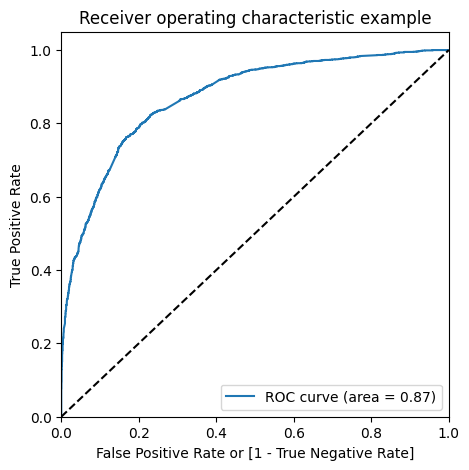

In [871]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.87 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [872]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.249981,8003,0,1,1,1,0,0,0,0,0,0,0
1,0,0.098840,218,0,1,0,0,0,0,0,0,0,0,0
2,1,0.081919,4171,0,1,0,0,0,0,0,0,0,0,0
3,1,0.351130,4037,0,1,1,1,1,0,0,0,0,0,0
4,1,0.972886,3660,1,1,1,1,1,1,1,1,1,1,1


In [873]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.568707  0.986505  0.180363
0.2   0.2  0.705223  0.951140  0.476644
0.3   0.3  0.761040  0.885528  0.645329
0.4   0.4  0.793992  0.813402  0.775952
0.5   0.5  0.797355  0.757096  0.834775
0.6   0.6  0.773593  0.652396  0.886246
0.7   0.7  0.750056  0.567706  0.919550
0.8   0.8  0.719794  0.467194  0.954585
0.9   0.9  0.663753  0.317822  0.985294


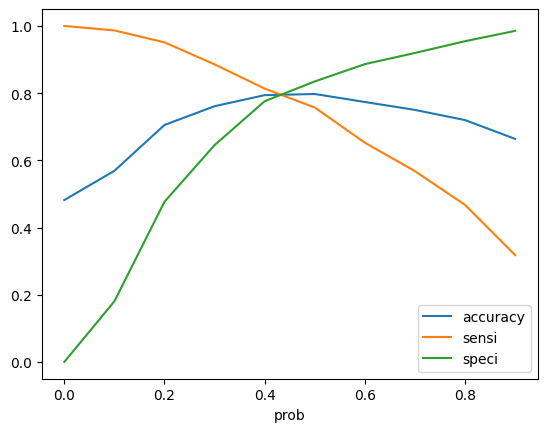

In [874]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [875]:
#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.249981,8003,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.098840,218,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.081919,4171,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.351130,4037,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.972886,3660,1,1,1,1,1,1,1,1,1,1,1,1


In [876]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.249981,8003,0,25
1,0,0.098840,218,0,10
2,1,0.081919,4171,0,8
3,1,0.351130,4037,0,35
4,1,0.972886,3660,1,97


In [877]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7962340282447882

In [878]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1830,  482],
       [ 427, 1722]])

In [879]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [880]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8013029315960912

In [881]:
# Let us calculate specificity
TN / float(TN+FP)

0.7915224913494809

### Observation(test set):
#### Accuracy : 79.62%
#### Sensitivity : 80.13%
#### Specificity : 79.15%

In [882]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20847750865051903


In [883]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7813067150635209


In [884]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8108108108108109


In [885]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1830,  482],
       [ 427, 1722]])

In [886]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7813067150635209

In [887]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8013029315960912

In [888]:
from sklearn.metrics import precision_score, recall_score

In [889]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7813067150635209

In [890]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8013029315960912

In [891]:
from sklearn.metrics import precision_recall_curve

In [892]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

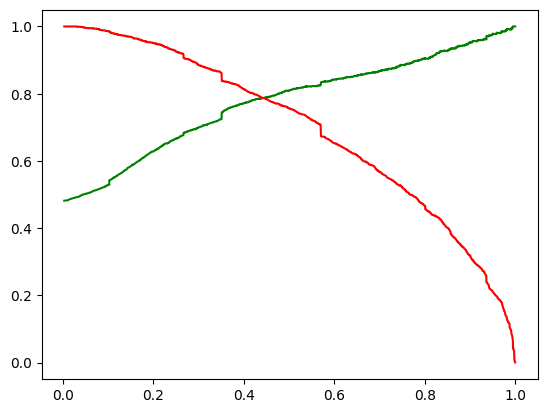

In [893]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [894]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,-0.902685,-0.955492,-1.044782,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,0.866207,-0.838993,1.841743,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,0.108111,0.716094,0.604661,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,-0.144588,0.564292,0.192300,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,1.118906,0.629602,0.604661,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [895]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,-0.955492,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,-0.838993,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9202,0.716094,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6570,0.564292,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,0.629602,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### PREDICTIONS ON TEST SET

In [896]:
X_test_sm = sm.add_constant(X_test)

In [897]:
y_test_pred = res.predict(X_test_sm)

In [898]:
y_test_pred[:10]

4771    0.997497
6122    0.113223
9202    0.734992
6570    0.251422
2668    0.391618
4233    0.899535
3368    0.781545
9091    0.710957
5972    0.094962
3631    0.709884
dtype: float64

In [899]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [900]:
# Let's see the head
y_pred_1.head()

,0
4771,0.997497
6122,0.113223
9202,0.734992
6570,0.251422
2668,0.391618


In [901]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [902]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [903]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [904]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [905]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4771,0.997497
1,0,6122,0.113223
2,0,9202,0.734992
3,1,6570,0.251422
4,1,2668,0.391618


In [906]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [907]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4771,0.997497
1,0,6122,0.113223
2,0,9202,0.734992
3,1,6570,0.251422
4,1,2668,0.391618


In [908]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [909]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4771,1,0.997497,100
1,6122,0,0.113223,11
2,9202,0,0.734992,73
3,6570,1,0.251422,25
4,2668,1,0.391618,39


In [910]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [911]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4771,1,0.997497,100,1
1,6122,0,0.113223,11,0
2,9202,0,0.734992,73,1
3,6570,1,0.251422,25,0
4,2668,1,0.391618,39,1


In [912]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7583682008368201

In [913]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[636, 360],
       [102, 814]])

In [914]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [915]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.888646288209607

In [916]:
# Let us calculate specificity
TN / float(TN+FP)

0.6385542168674698

In [917]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6933560477001703

In [918]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.888646288209607

### Observation(test set):
#### Accuracy : 75.83%
#### Sensitivity : 88.86%
#### Specificity : 63.85%

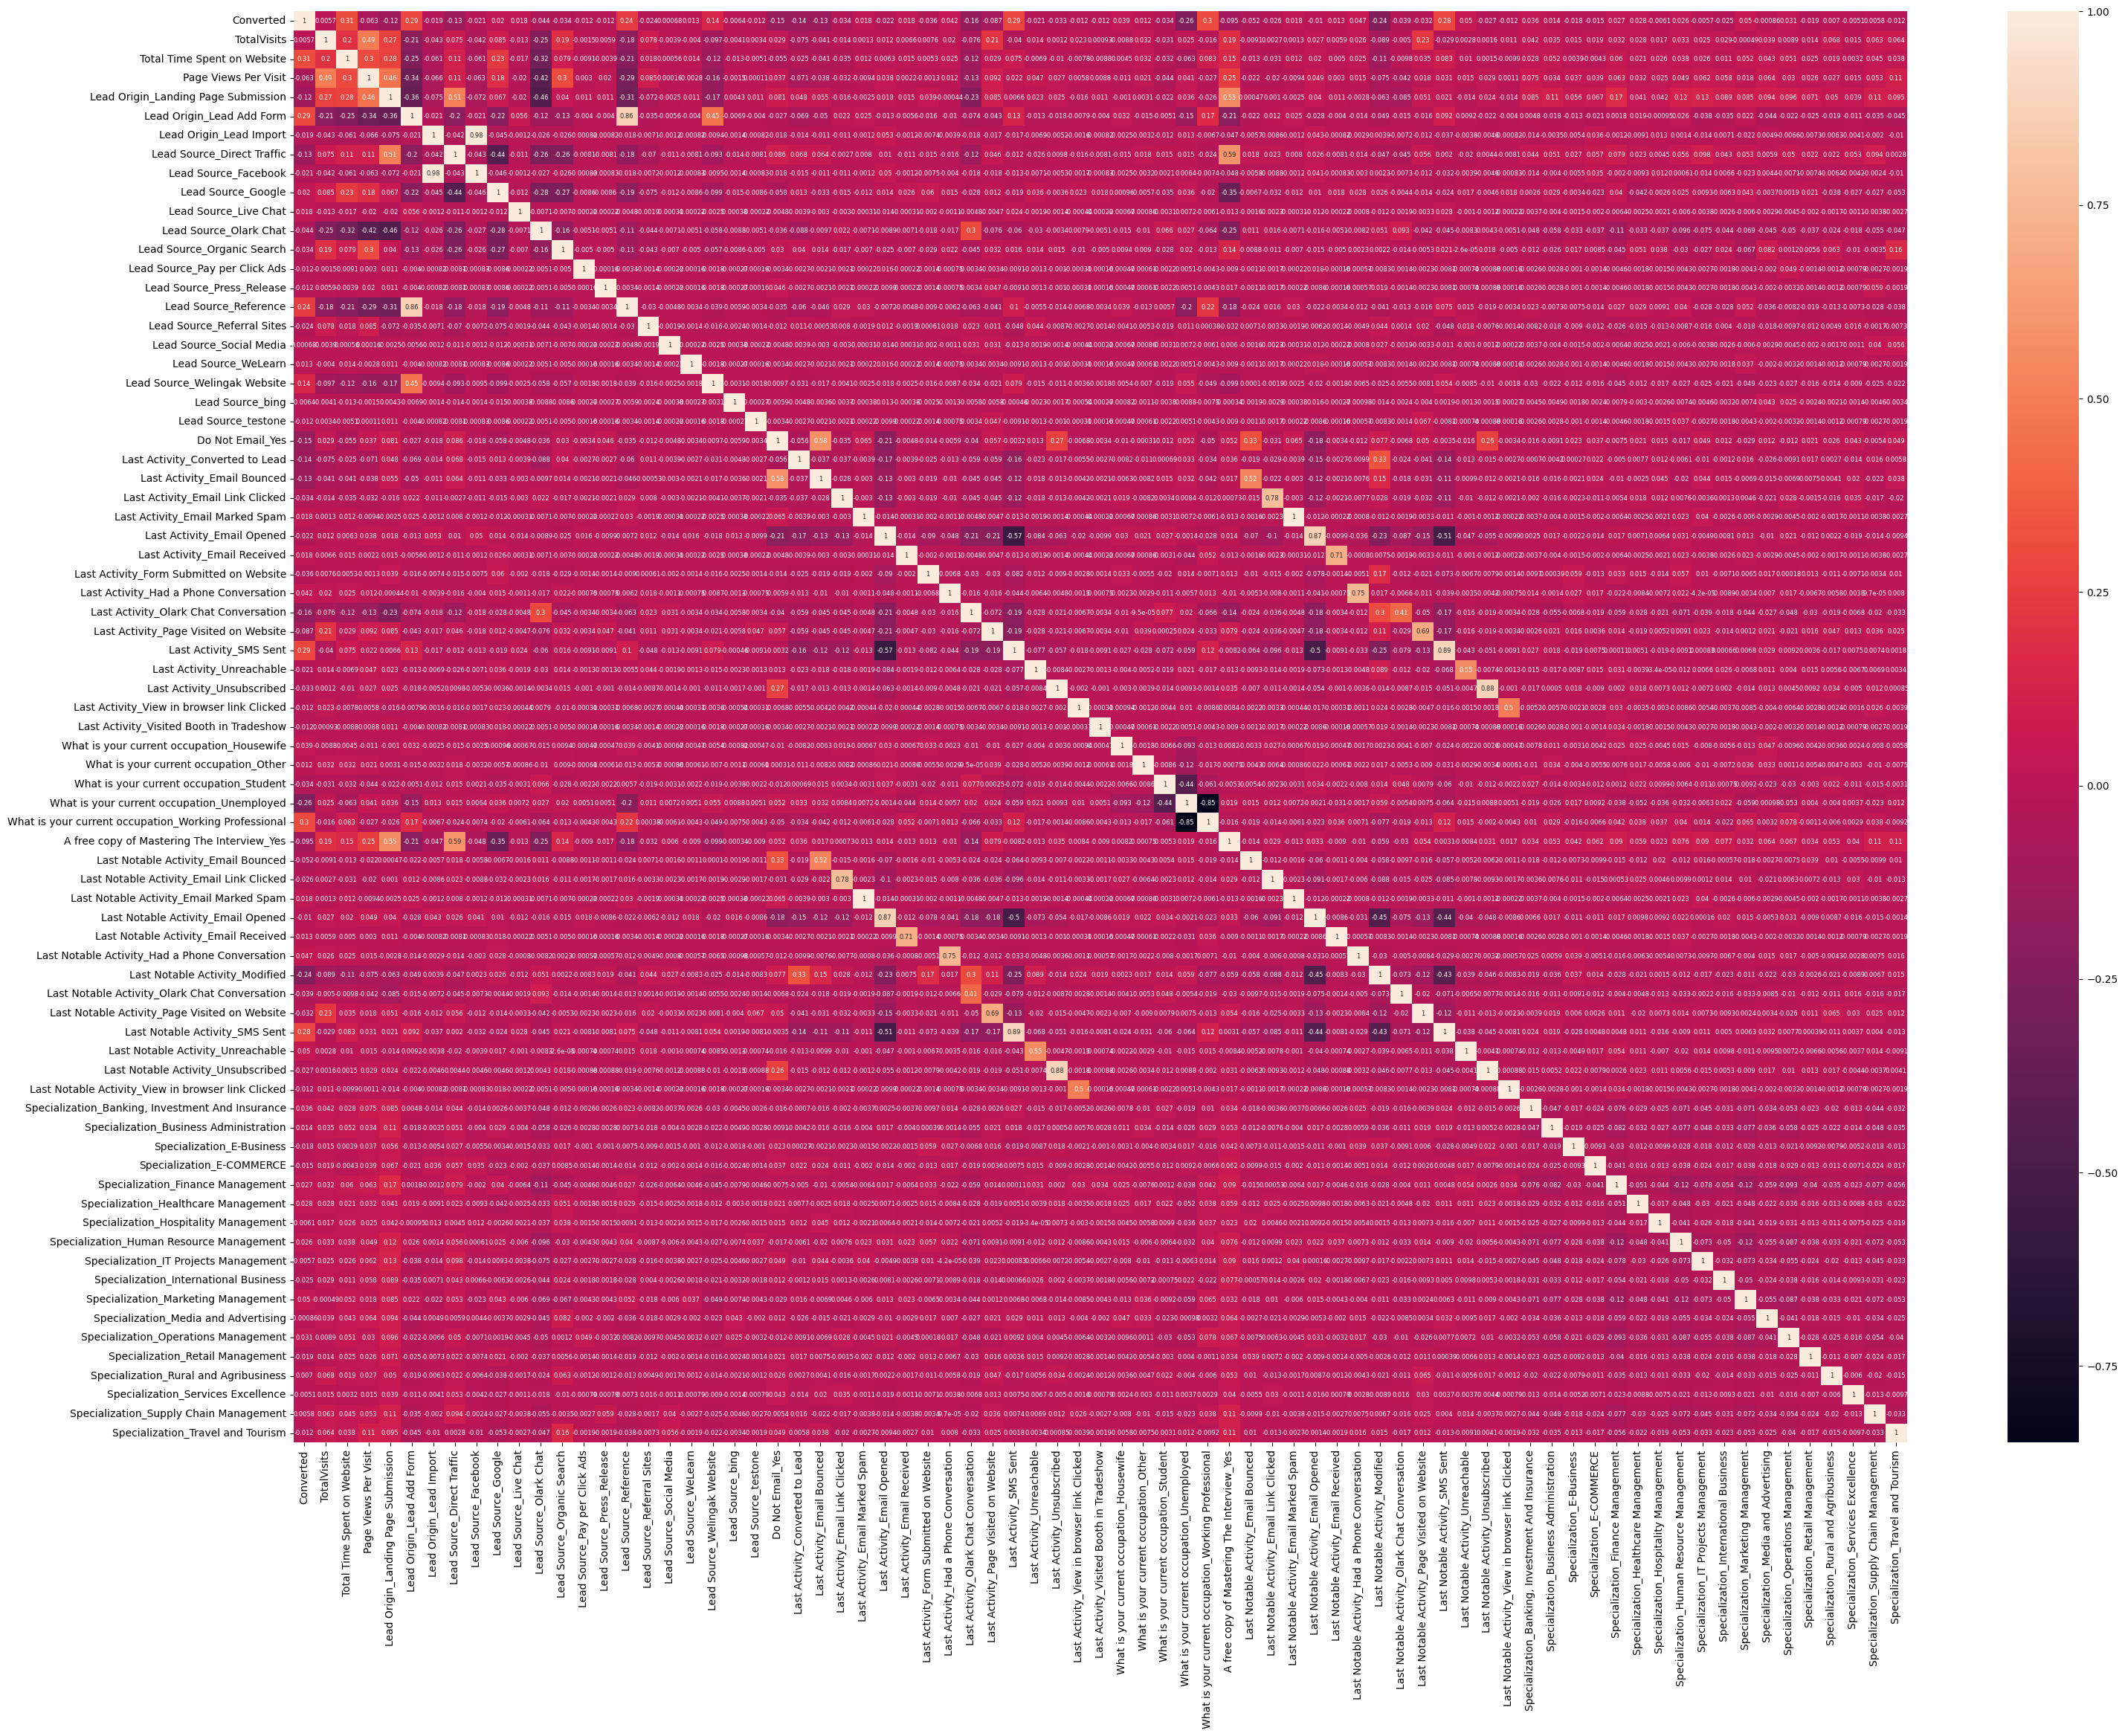

In [927]:
# Looking at the correlation table
plt.figure(figsize = (35,25))
g = xleads.corr()
sns.heatmap(g, annot = True, annot_kws={"size":6})
plt.show()